# Segmenting an image via thresholding

In [3]:
if True:      #A weird trick needed for Google Colab
  # Clone repository with example images 
  !rm -rf fyp2022-imaging
  !git clone https://github.com/vcheplygina/fyp2022-imaging.git

'rm' is not recognized as an internal or external command,
operable program or batch file.
fatal: destination path 'fyp2022-imaging' already exists and is not an empty directory.


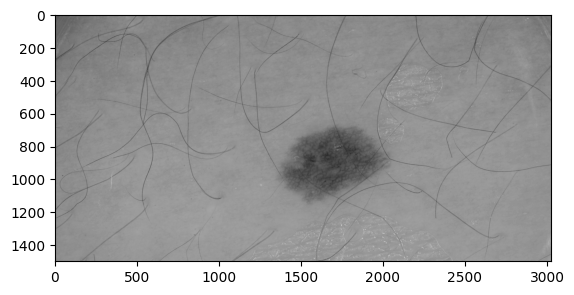

In [4]:
# Prepare an image

import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

file_im = 'fyp2022-imaging/data/example_image/ISIC_0001769.jpg'
im = plt.imread(file_im)
im2 = im[0:1500,:,:]
im2 = rgb2gray(im2)*256
plt.imshow(im2, cmap='gray')

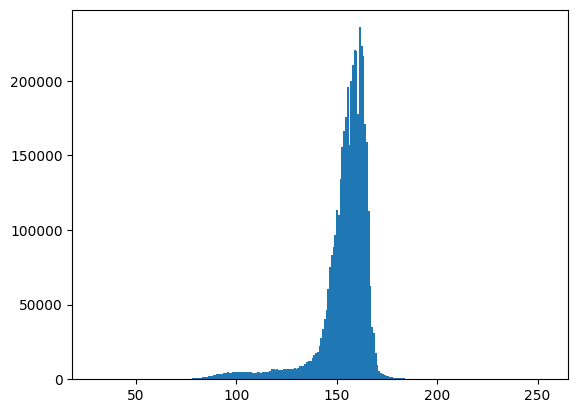

In [5]:
# Image intensity

im_hist = plt.hist(im2.flatten(), bins = 256)
plt.show()


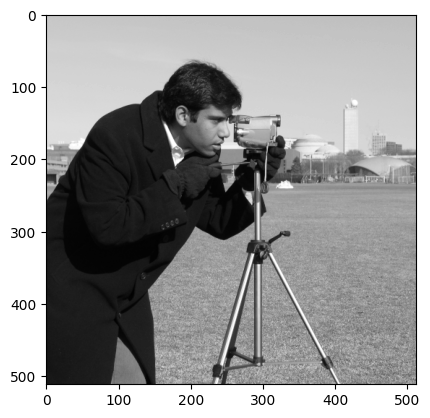

In [6]:
# More intuition

# Get some example images from skimage
from skimage import data

im_names = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )


#example_im = data.camera()

caller = getattr(data, 'camera')
example_im = caller()
plt.imshow(example_im, cmap='gray')


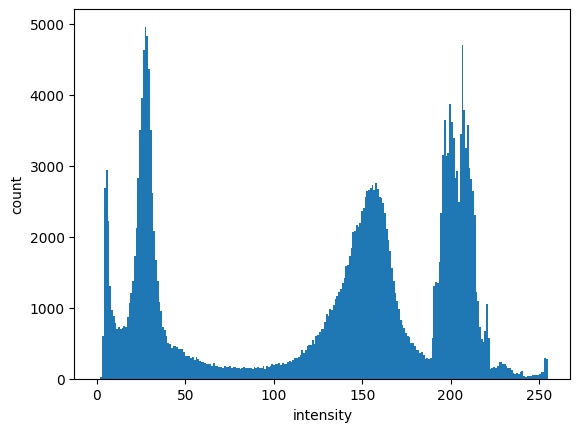

In [7]:
# Image intensity

im_hist = plt.hist(example_im.flatten(), bins = 256)
plt.xlabel('intensity')
plt.ylabel('count')
plt.show()

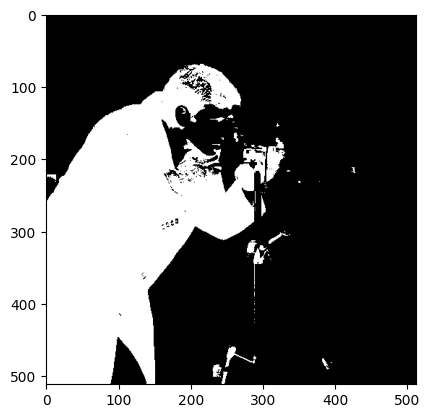

In [8]:
# We can find parts corresponding to the histogram peaks

ex2 = example_im < 50
plt.imshow(ex2, cmap='gray')


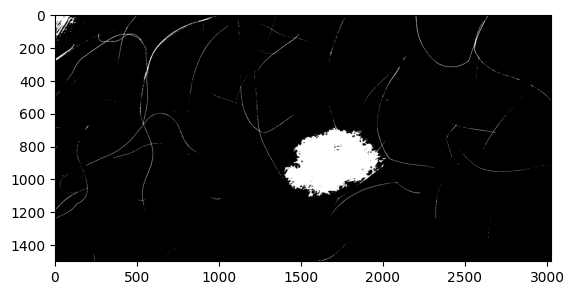

In [9]:
# Can we use the histogram to extract the lesion?

im_mask = im2 < 120                 #Value selected by looking at the histogram
plt.imshow(im_mask, cmap='gray')



135.2225694117647


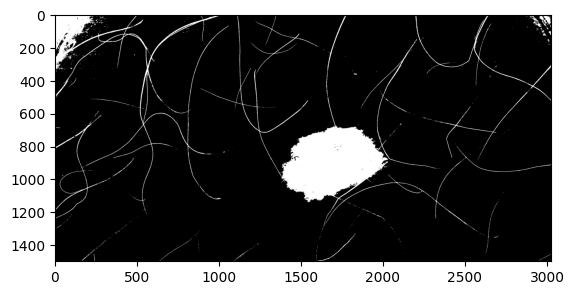

In [10]:
# Select the threshold automatically

from skimage import filters

val = filters.threshold_otsu(im2)
print(val)

mask = im2 < val

plt.imshow(mask, cmap='gray')

# Morphology

[[0 0 0 1 0 0 0]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [1 1 1 1 1 1 1]
 [0 1 1 1 1 1 0]
 [0 1 1 1 1 1 0]
 [0 0 0 1 0 0 0]]


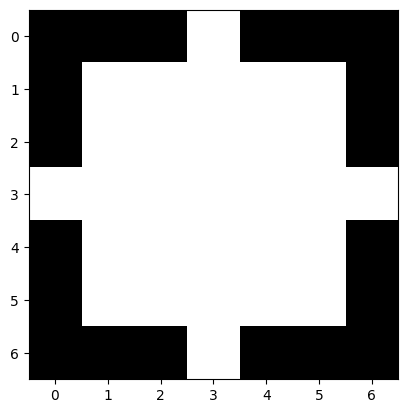

In [11]:
# Postprocessing with morphology

from skimage import morphology

# Structural element, that we will use as a "brush". The parameter is "brush side"
struct_el = morphology.disk(3)

print(struct_el)
plt.imshow(struct_el, cmap='gray')



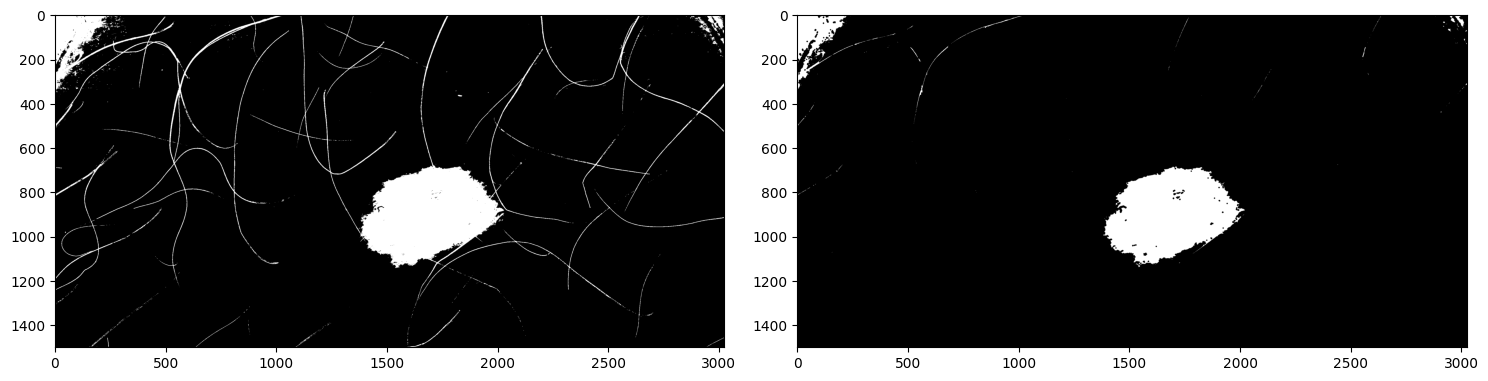

In [12]:
# Use this "brush" to erode the image
mask_eroded = morphology.binary_erosion(mask, struct_el)

# Show side by side 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
axes[0].imshow(mask, cmap='gray')
axes[1].imshow(mask_eroded, cmap='gray')
fig.tight_layout()



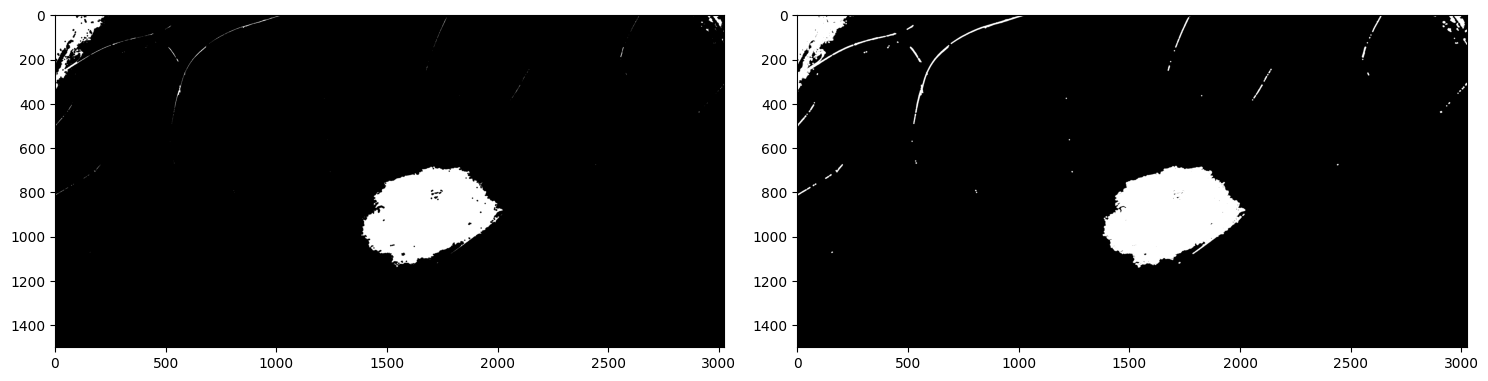

In [13]:
# Already better, but now there are more holes in the lesion! 

# Let's do the opposite
mask_dilated = morphology.binary_dilation(mask_eroded, struct_el)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 9))
axes[0].imshow(mask_eroded, cmap='gray')
axes[1].imshow(mask_dilated, cmap='gray')
fig.tight_layout()